<a href="https://colab.research.google.com/github/alineaprelini/Estat-stica/blob/main/An%C3%A1lise_estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

##**Fonte de dados**

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm



In [4]:
df = pd.read_csv('dados.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
#Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [6]:
#ordernar dados
df.sort_values(by='Idade', ascending=True)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
2798,13,0,13,8,6,100,1.606256
40579,32,0,14,8,4,300,1.654433
1426,11,0,15,4,6,400,1.641466
28607,29,0,15,8,4,200,1.621880
22316,26,0,15,8,6,1500,1.658164
...,...,...,...,...,...,...,...
54841,35,0,92,2,16,15000,1.727339
36162,31,0,94,2,4,0,1.801055
1789,12,0,95,8,9,500,1.860137
11834,21,0,97,0,1,0,1.759283


In [7]:
df.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [8]:
#Duas casas decimais para altura
df['Altura'] = df['Altura'].round(2)
df['Renda'] = df['Renda'].round(2)

In [9]:
df['Altura'].head()

,Altura
0,1.60
1,1.74
2,1.76
3,1.78
4,1.69


In [10]:
#Minimo e máximo de idade
print('De %s até %s anos' %(df['Idade'].min(), df['Idade'].max()))

De 13 até 99 anos


In [11]:
#Minimo e máximo de renda
print('De %s até %s reais' %(df['Renda'].min(), df['Renda'].max()))

De 0 até 200000 reais


##**Distribução de frequência**

In [12]:
Frequencia = df['Sexo'].value_counts() #Somente os responsáveis pela residencia respondeu

In [13]:
Percentual = df['Sexo'].value_counts(normalize = True).round(2) *100 #proporção por sexo (%)

In [14]:
freq_qualitativa = pd.DataFrame({'Frequencia': Frequencia, 'Percentual': Percentual})

In [15]:
freq_qualitativa

,Frequencia,Percentual
Sexo,,
0,53250,69.0
1,23590,31.0


In [16]:
freq_qualitativa = freq_qualitativa.rename(index={0: 'Masculino', 1: 'Feminino'})

In [17]:
freq_qualitativa

,Frequencia,Percentual
Sexo,,
Masculino,53250,69.0
Feminino,23590,31.0


In [18]:
#Criar dicionário para mapear os id
sexo = {
    0 : 'Masculino',
    1 : 'Feminino'
}

cor = {
    0 : 'Indígena',
    2 : 'Branca',
    4 : 'Preta',
    6 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
}

In [19]:
frequencia = pd.crosstab(df['Sexo'], df['Cor'])
frequencia.rename(index=sexo, columns=cor, inplace=True)
frequencia


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [20]:
percentual = pd.crosstab(df['Sexo'], df['Cor'] ,normalize = True) *100
percentual.rename(index=sexo, columns=cor, inplace=True)
percentual


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [21]:
# Renda média
Renda = pd.crosstab(df['Sexo'], df['Cor'], aggfunc= 'mean', values= df['Renda'])
Renda.rename(index=sexo, columns=cor, inplace=True)
Renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [22]:
#Criar tabela de frequencia

classes = [0,1576,3152,7880,15760,200000]
labels = ['E', 'D', 'C', 'B', 'A']

frequencia_renda = pd.cut(df['Renda'], bins = classes, labels = labels, include_lowest = True).value_counts()
frequencia_renda

,count
Renda,
E,49755
D,16700
C,7599
B,2178
A,608


In [23]:
#Criar tabela de frequencia (percentual)

percentual = pd.value_counts(pd.cut(df['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True)*100


percentual

<ipython-input-23-0fe94841fd84>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(pd.cut(df['Renda'], bins=classes, labels=labels, include_lowest=True), normalize=True)*100


,proportion
Renda,
E,64.751432
D,21.733472
C,9.889381
B,2.834461
A,0.791255


In [24]:
tab_freq = pd.DataFrame({'Total': frequencia_renda,'Percentual': percentual})
tab_freq.sort_index(ascending = False)

,Total,Percentual
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


<ipython-input-34-d026704ea9d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Renda'], kde=True)


Text(0.5, 1.0, 'Distibuição de frequencia - Renda')

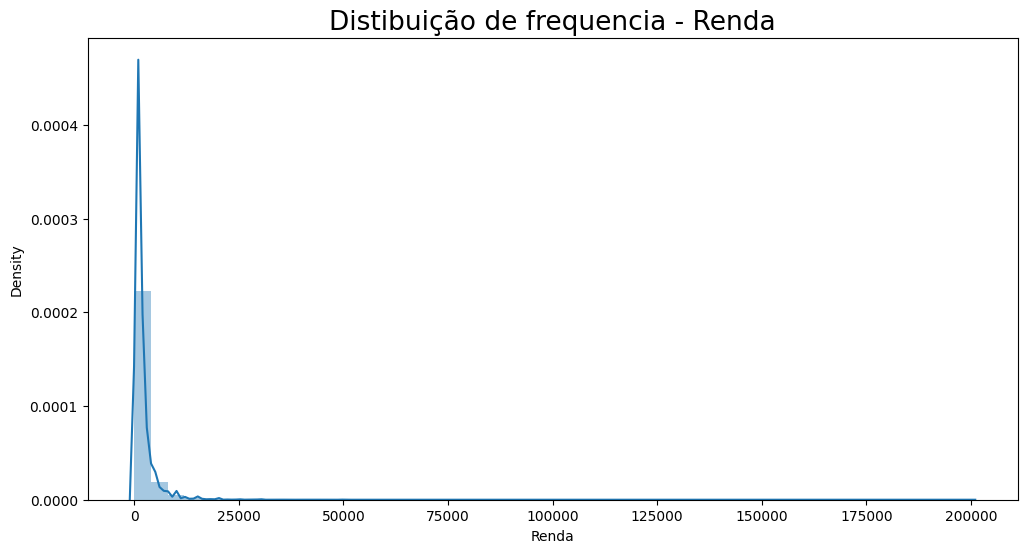

In [34]:
#histograma
ax = sns.distplot(df['Renda'], kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distibuição de frequencia - Renda', fontsize = 19)

<ipython-input-35-d6e1950129b0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Altura'], kde=True)


Text(0.5, 1.0, 'Distibuição de frequencia - Altura')

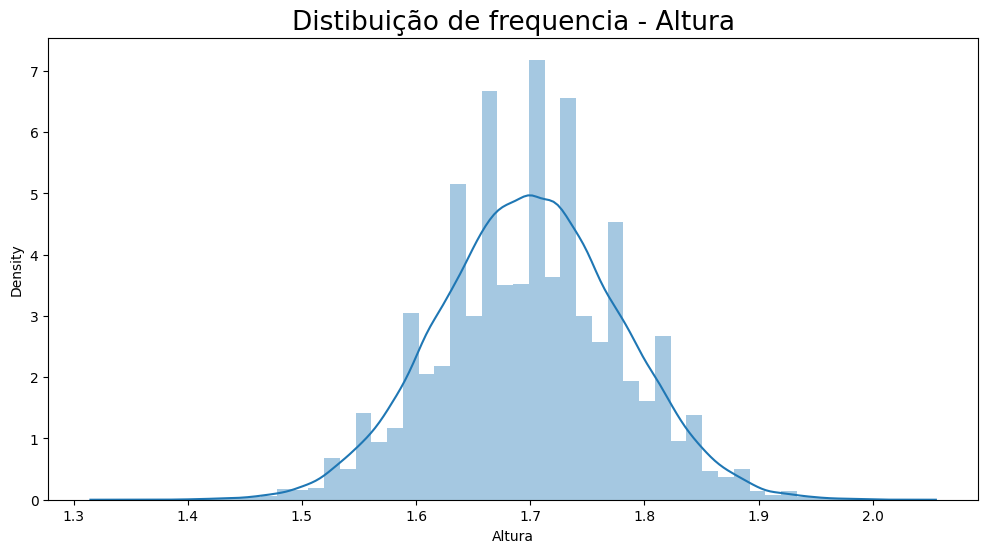

In [35]:
#histograma
ax = sns.distplot(df['Altura'], kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distibuição de frequencia - Altura', fontsize = 19)